 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
file_path = Path("Resources/whale_returns.csv")
whale = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_2 = whale.dropna()
whale_2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
file_path = Path("Resources/algo_returns.csv")
algo = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_2 = algo.dropna()

In [8]:
algo_2.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
file_path = Path("Resources/sp500_history.csv")
SP500 = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
SP500.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
SP500.Close = SP500.Close.apply(lambda x: x.replace('$',''))
SP500["Close"] = SP500.Close.astype(float)

In [12]:
# Calculate Daily Returns

daily_returns = SP500.pct_change()

daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
daily_returns_2 = daily_returns.dropna()

daily_returns_2.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [20]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_2 = daily_returns_2.rename(columns={'Close': 'SP500_Returns'})
daily_returns_2.head()

,SP500_Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_data = pd.concat([whale_2, algo_2, daily_returns_2], axis="columns", join="inner")
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

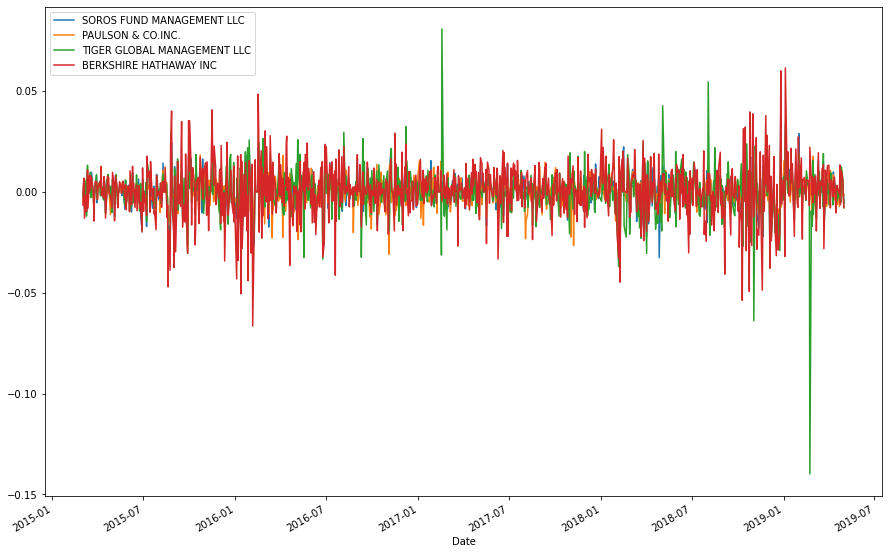

In [28]:
# Plot daily returns of all portfolios
whale_2.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

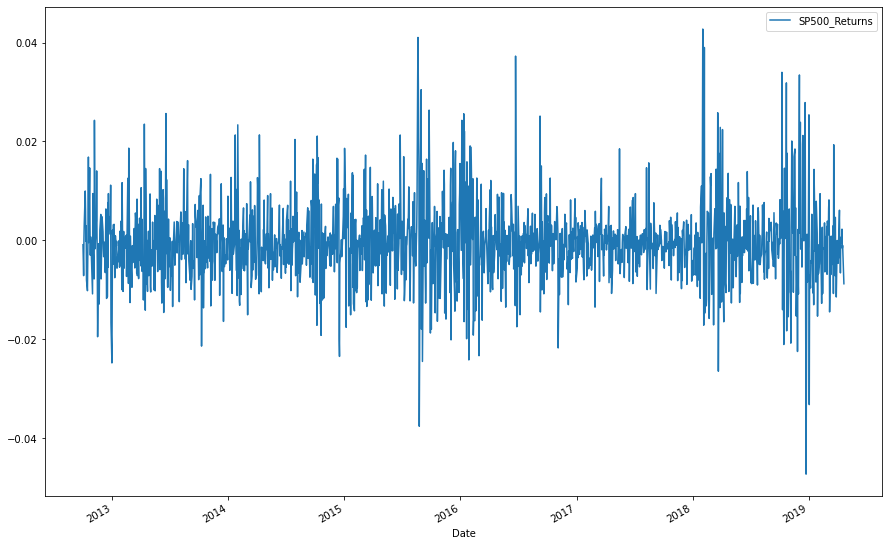

In [29]:
daily_returns_2.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

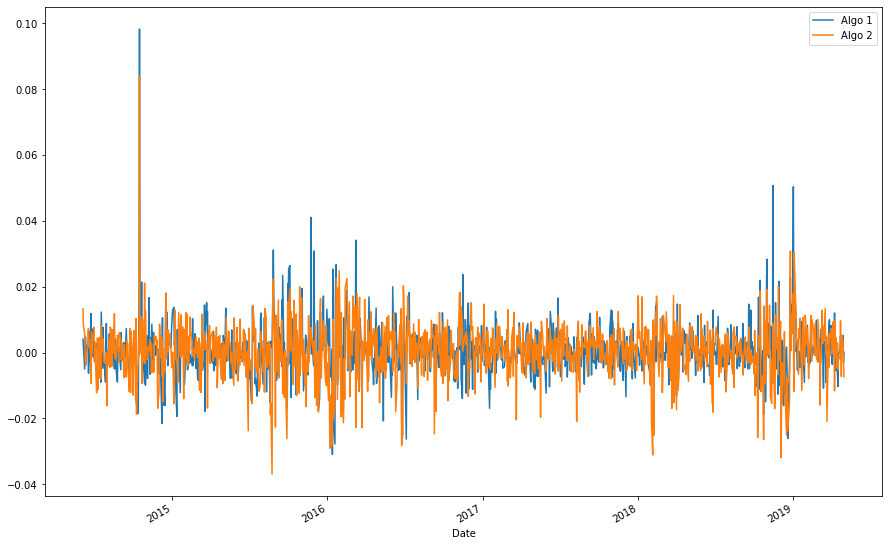

In [27]:
algo_2.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

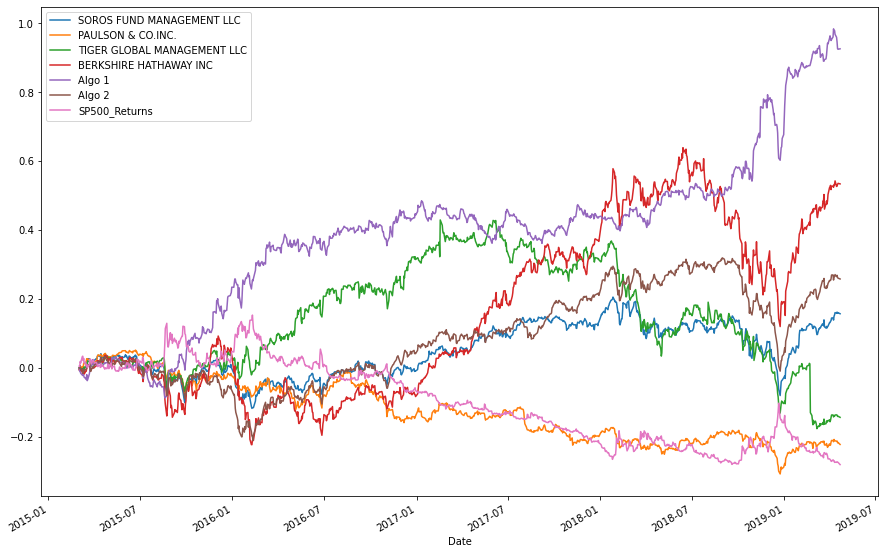

In [33]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + column_appended_data).cumprod() - 1

cumulative_returns.plot(figsize=(15,10))

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

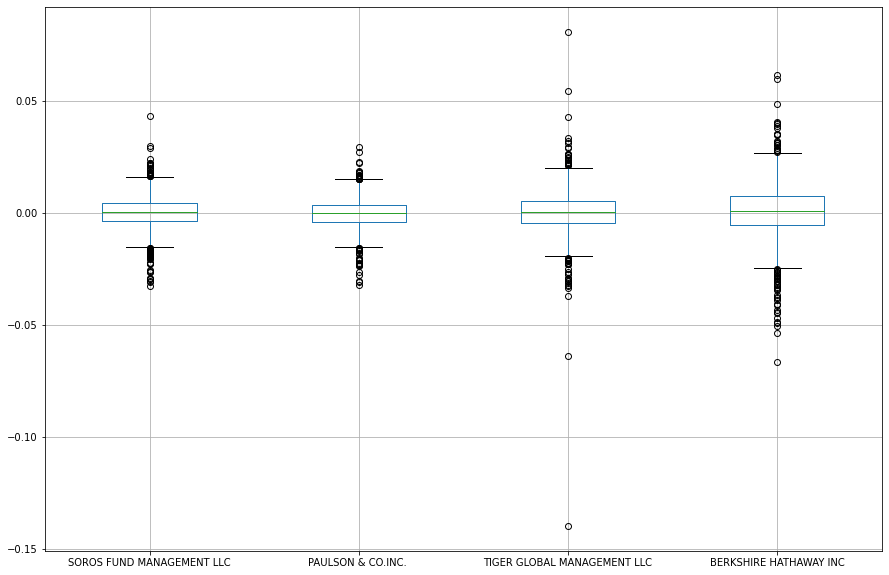

In [35]:
# Box plot to visually show risk
whale_2.boxplot(figsize=(15,10))

<AxesSubplot:>

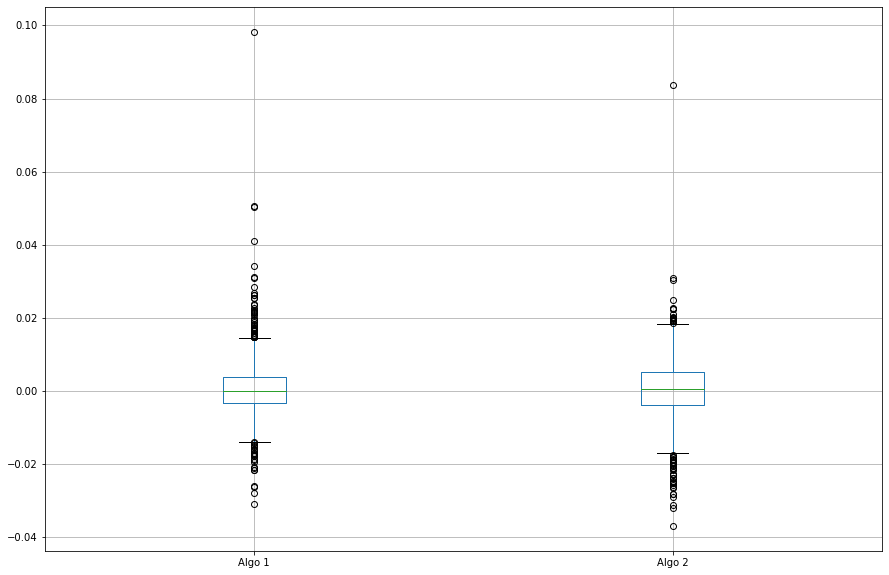

In [36]:
algo_2.boxplot(figsize=(15,10))

<AxesSubplot:>

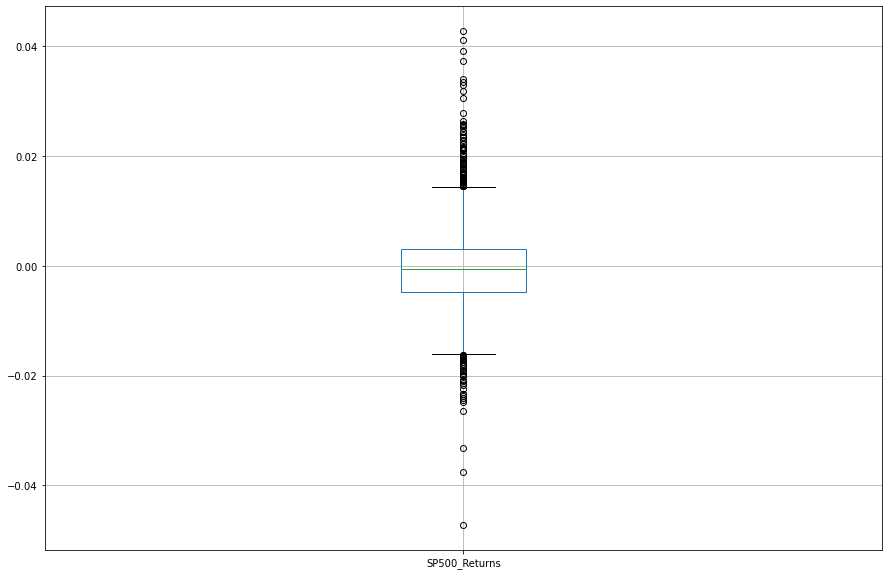

In [38]:
daily_returns_2.boxplot(figsize=(15,10))

### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios

whale_2.std()


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [40]:
algo_2.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [41]:
# Calculate  the daily standard deviation of S&P 500
daily_returns_2.std()

# Determine which portfolios are riskier than the S&P 500
## Tiger Global and Berkshire have more volatility

SP500_Returns    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

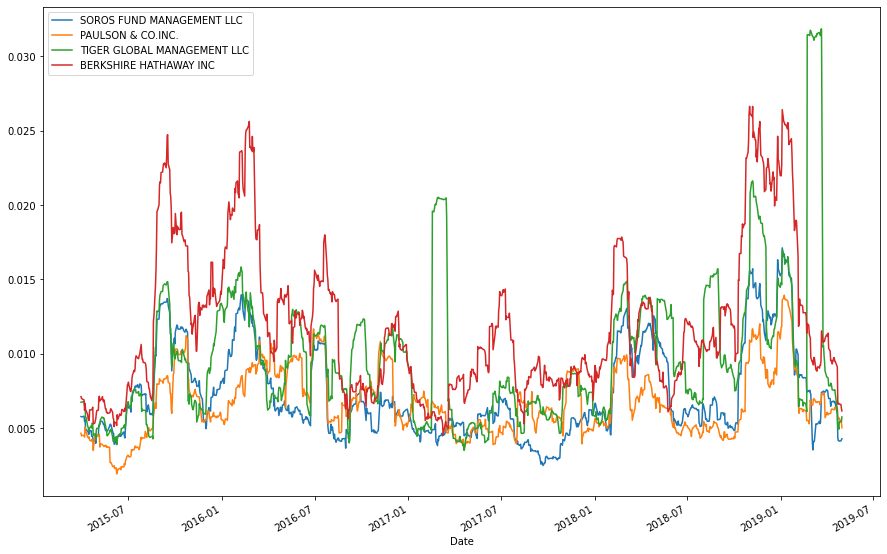

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_2.rolling(window=21).std().plot(figsize=(15,10))

# Plot the rolling standard deviation


<AxesSubplot:xlabel='Date'>

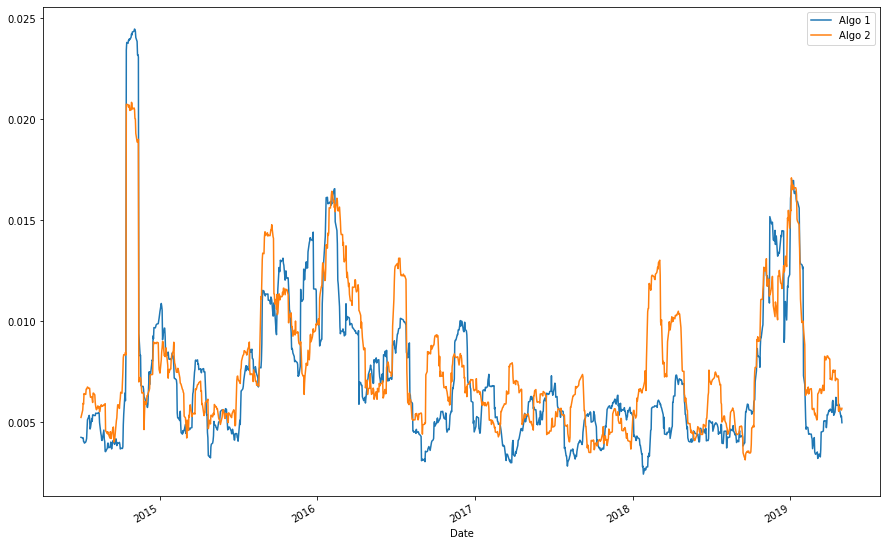

In [46]:
algo_2.rolling(window=21).std().plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

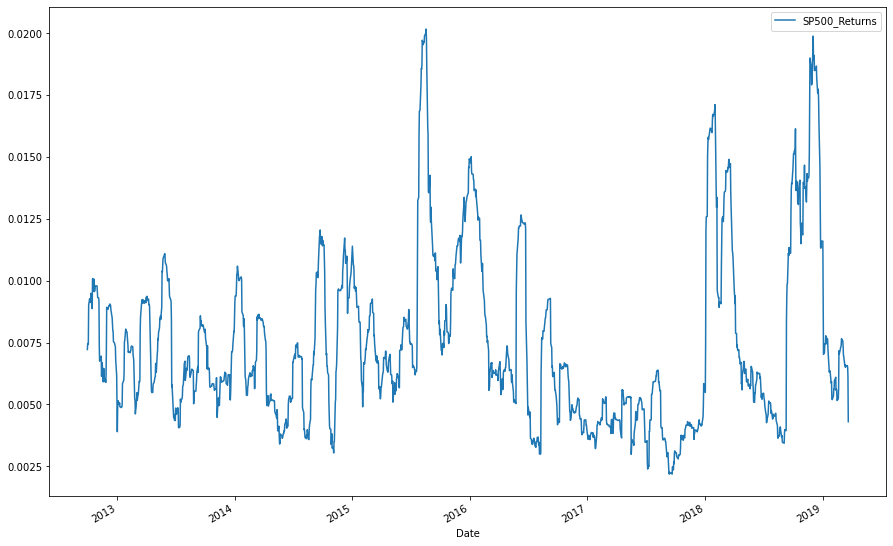

In [47]:
daily_returns_2.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

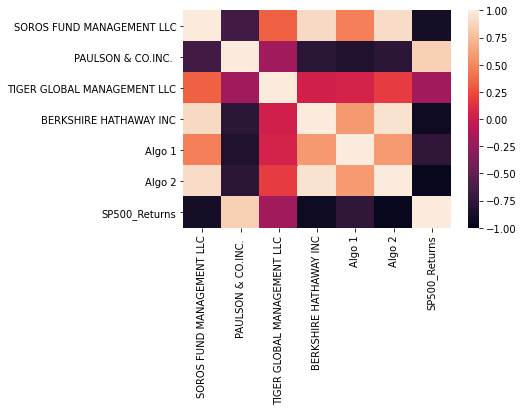

In [55]:
# Calculate the correlation
import seaborn as sns

price_correlation = cumulative_returns.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

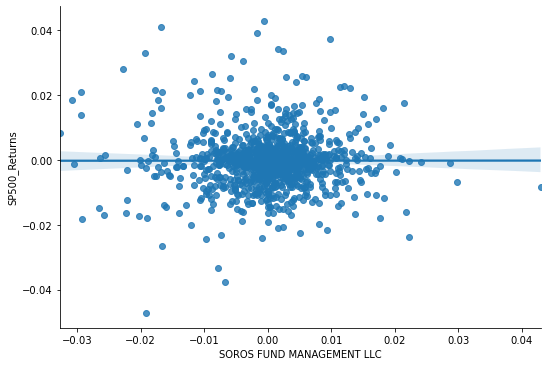

In [69]:
# Calculate covariance of a single portfolio
covariance_1 = column_appended_data['SOROS FUND MANAGEMENT LLC'].cov(column_appended_data['SP500_Returns'])

#covariance_2 = column_appended_data['PAULSON & CO.INC.'].cov(column_appended_data['SP500_Returns'])

#covariance_3 = column_appended_data['TIGER GLOBAL MANAGEMENT LLC'].cov(column_appended_data['SP500_Returns'])

#covariance_4 = column_appended_data['BERKSHIRE HATHAWAY INC'].cov(column_appended_data['SP500_Returns'])

#covariance_5 = column_appended_data['Algo 1'].cov(column_appended_data['SP500_Returns'])

#covariance_6 = column_appended_data['Algo 2'].cov(column_appended_data['SP500_Returns'])



# Calculate variance of S&P 500

variance = column_appended_data['SP500_Returns'].var()

# Computing beta

beta = covariance_1 / variance

# Plot beta trend
sns.lmplot(x='SOROS FUND MANAGEMENT LLC', y='SP500_Returns', data=column_appended_data, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [85]:
# Use `ewm` to calculate the rolling window
ewm = column_appended_data.ewm(halflife = 21, min_periods = 252)

ewm

ExponentialMovingWindow [com=29.799346392775035,min_periods=252,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [99]:
# Annualized Sharpe Ratios
rf_rate = '.01'

sharpe_ratios = ((column_appended_data.mean() * 252) / (column_appended_data.std() * np.sqrt(252)))

sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

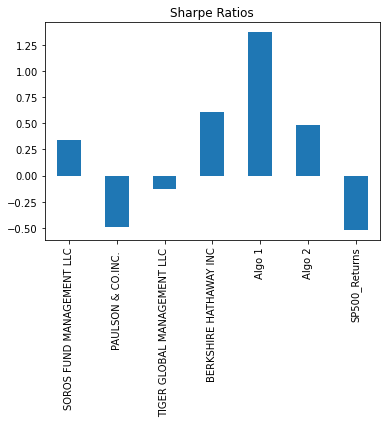

In [106]:
# Visualize the sharpe ratios as a bar plot

import matplotlib.pyplot as plt

#plt.bar(column_appended_data.columns,sharpe_ratios, color ='maroon',
        #width = .75)
    
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algos did the best.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [111]:
# Reading data from 1st stock
the_path = Path('Resources/aapl_historical.csv')
aapl = pd.read_csv(the_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [112]:
# Reading data from 2nd stock
the_path = Path('Resources/goog_historical.csv')
goog = pd.read_csv(the_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [113]:
# Reading data from 3rd stock
the_path = Path('Resources/cost_historical.csv')
cost = pd.read_csv(the_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [114]:
# Combine all stocks in a single DataFrame
stocks_appended_data = pd.concat([aapl, goog, cost], axis="columns", join="inner")
stocks_appended_data.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [152]:
# Reorganize portfolio data by having a column per symbol
aapl_data = stocks_appended_data.iloc[:,1]
goog_data = stocks_appended_data.iloc[:,3]
cost_data = stocks_appended_data.iloc[:,5]

aapl_1 = pd.DataFrame(data=aapl_data)
goog_1 = pd.DataFrame(data=goog_data)
cost_1 = pd.DataFrame(data=cost_data)
aapl_2 = aapl_1.rename(columns={'NOCP': 'AAPL'})
goog_2 = goog_1.rename(columns={'NOCP': 'GOOG'})
cost_2 = cost_1.rename(columns={'NOCP': 'COST'})

aapl_3 = aapl_2.pct_change()
goog_3 = goog_2.pct_change()
cost_3 = cost_2.pct_change()

stocks_appended_data_2 = pd.concat([aapl_3, goog_3, cost_3], axis="columns", join="inner")

stocks_3 = stocks_appended_data_2.dropna()
stocks_3.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [182]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = stocks_3.dot(weights)
my_portfolio = pd.DataFrame(data=portfolio_returns, columns=['My Port'])
my_portfolio.head()

,My Port
Trade DATE,
2019-05-08,0.001820
2019-05-07,0.000570
2019-05-06,0.019196
2019-05-03,0.004642
2019-05-02,-0.013131


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [183]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([my_portfolio, column_appended_data], axis="columns", join="inner")

In [184]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.head()

,My Port,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [185]:
# Calculate the annualized `std`
joined_df.std()

My Port                        0.013426
SOROS FUND MANAGEMENT LLC      0.009234
PAULSON & CO.INC.              0.007350
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
Algo 1                         0.008419
Algo 2                         0.008769
SP500_Returns                  0.009584
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

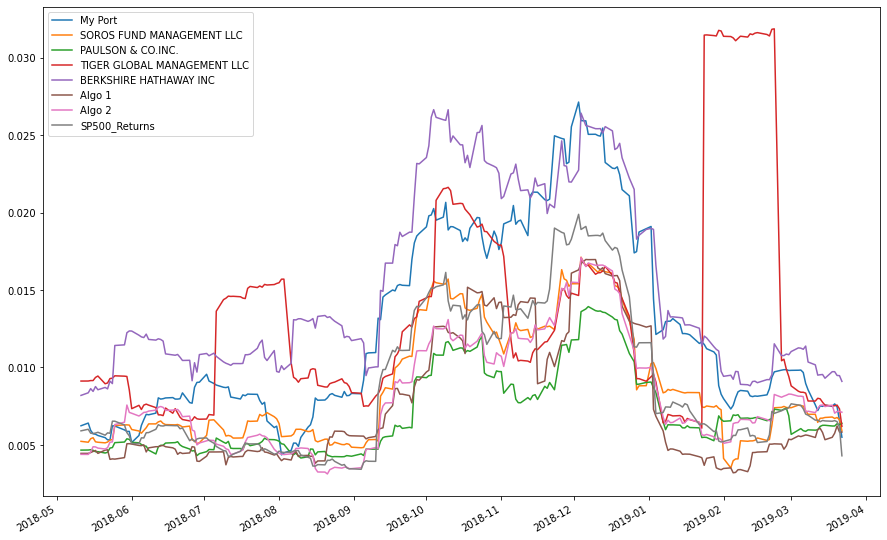

In [186]:
# Calculate rolling standard deviation
joined_df.rolling(window=21).std().plot(figsize=(15,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

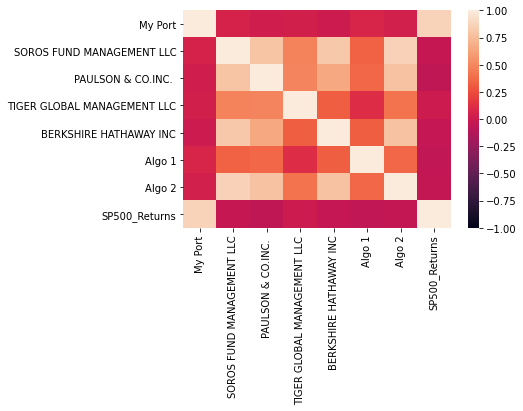

In [187]:
# Calculate and plot the correlation
correlation_2 = joined_df.corr()

#Display de correlation matrix
sns.heatmap(correlation_2, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

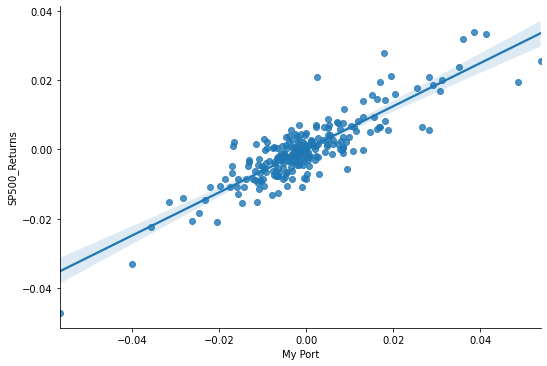

In [188]:
# Calculate and plot Beta
covariance = joined_df['My Port'].cov(joined_df['SP500_Returns'])

variance = joined_df['SP500_Returns'].var()

# Computing beta

beta = covariance / variance

# Plot beta trend
sns.lmplot(x='My Port', y='SP500_Returns', data=joined_df, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [190]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = ((joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252)))
#risk free is nothing
sharpe_ratios

My Port                       -0.613547
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
SP500_Returns                 -0.432942
dtype: float64

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.bar

### How does your portfolio do?

Write your answer here!